<a href="https://colab.research.google.com/github/umamanasir1999/TSF-GRIP-Task/blob/main/Task_01_Linear_Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP : The Sparks Foundation
# Data Science & Business Analytics Internship (MAY 2021)
**Intern - Umama Nasir**
>**Task #1** **- Prediction using Supervised ML**
> **Problem Statement**
>*   Predict the percentage of an student based on the no. of study hours.
>*   What will be predicted score if a student studies for 9.25 hrs/ day?



















**Step 1 - Importing the Libraries & Dataset**

In [1]:
# importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics 

In [2]:
# reading data from remote link
dataset = pd.read_csv ("http://bit.ly/w-data")
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# check if there any null value in the dataset
dataset.isnull == True

False


There is no null value in the Dataset so, we can now visualize our Data

**Step 2 - Visualizing the Dataset**

> Since dataset is quite small so visualizing the data will give a better picture of the correlation between variables



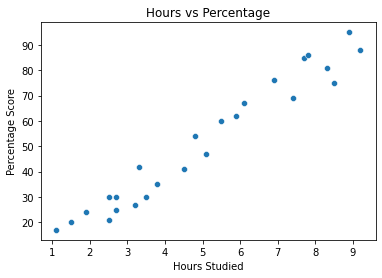

In [4]:
# plotting the distribution of scores
sns.scatterplot(y= dataset['Scores'], x= dataset['Hours'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above scatter plot there looks to be correlation between the ' Percentage Score' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

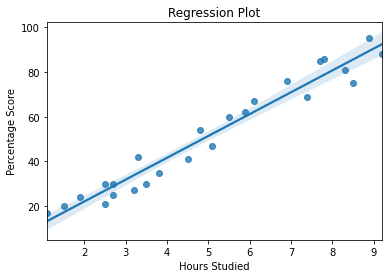

In [5]:
sns.regplot(x= dataset['Hours'], y= dataset['Scores'])
plt.title('Regression Plot')
plt.ylabel('Percentage Score')
plt.xlabel('Hours Studied')
plt.show()

In [6]:
# we can also use .corr to determine the correlation between two variables
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


It is confirmed that the variables are positively correlated.

**Step 3 - Data Preperation & Splitting the Dataset**

In [7]:
# using iloc function we will divide the data
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [8]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

**Step 4 - Training the Algorithm**

In [9]:
# fitting the data into the model
regressor = LinearRegression()  # creating an object of linear regression
regressor.fit(X_train, y_train) # fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step 5 - Visualizing the Model**


>Visualizing the linear regression, i.e. how line will fit to the data 



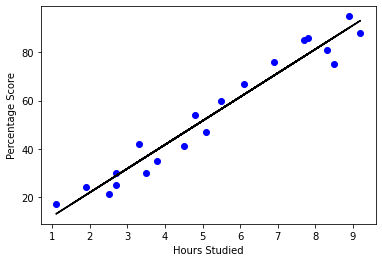

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='black');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**Step 6 - Making Predictions**

In [11]:
y_pred = regressor.predict(X_test) # Predicting the scores
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in y_pred]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [12]:
# comparing the actual and predicted values of dataframe
cmp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
cmp 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


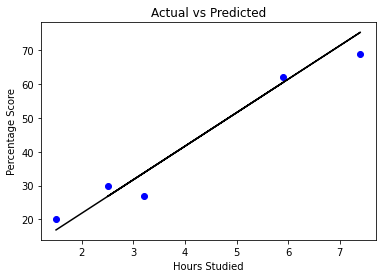

In [13]:
# visually comparing the pthe actual and predicted values of dataframe
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted')
plt.ylabel('Percentage Score')
plt.xlabel('Hours Studied')
plt.show()

**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [14]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.

**Step 7 - Evaluating the Model**


> This step is particularly important to compare how well different algorithms perform on a particular dataset. 








In [15]:
# Calculating the accuracy of the model 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.